# English Premier League 2021-2022 Prediction

The idea behind this project is to predict the scores of all the matches of EPL 2021-2022 season based on previous 4 seasons' result (from 2017-2018 to 2020-2021).

## Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup as bs

## Data Collection

The points table of EPL from 2017-2018 to 2020-2021 is collected from Wikipedia by web scraping. Only useful columns are 'Team' (name of the team), 'Pld' (total matches played) and 'Pts' (total points).

#### EPL 2017-2018

In [2]:
# Collect the data
url_1718 = requests.get("https://en.wikipedia.org/wiki/2017%E2%80%9318_Premier_League#League_table").text
soup = bs(url_1718, 'html.parser')
table_1718 = soup.find('table', {'class': 'wikitable', 'style': 'text-align:center;'})
team_1718 = pd.read_html(str(table_1718))
team_1718 = pd.DataFrame(team_1718[0])
team_1718.head()

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,1,Manchester City (C),38,32,4,2,106,27,+79,100,Qualification for the Champions League group s...
1,2,Manchester United,38,25,6,7,68,28,+40,81,Qualification for the Champions League group s...
2,3,Tottenham Hotspur,38,23,8,7,74,36,+38,77,Qualification for the Champions League group s...
3,4,Liverpool,38,21,12,5,84,38,+46,75,Qualification for the Champions League group s...
4,5,Chelsea,38,21,7,10,62,38,+24,70,Qualification for the Europa League group stag...


In [3]:
team_1718.shape

(20, 11)

In [4]:
# Take useful columns
team_1718 = team_1718[['Team', 'Pld', 'Pts']]
team_1718.head()

,Team,Pld,Pts
0,Manchester City (C),38,100
1,Manchester United,38,81
2,Tottenham Hotspur,38,77
3,Liverpool,38,75
4,Chelsea,38,70


#### EPL 2018-2019

In [5]:
# Collect the data
url_1819 = requests.get("https://en.wikipedia.org/wiki/2018%E2%80%9319_Premier_League#League_table").text
soup = bs(url_1819, 'html.parser')
table_1819 = soup.find('table', {'class': 'wikitable', 'style': 'text-align:center;'})
team_1819 = pd.read_html(str(table_1819))
team_1819 = pd.DataFrame(team_1819[0])
team_1819.head()

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,1,Manchester City (C),38,32,2,4,95,23,+72,98,Qualification for the Champions League group s...
1,2,Liverpool,38,30,7,1,89,22,+67,97,Qualification for the Champions League group s...
2,3,Chelsea,38,21,9,8,63,39,+24,72,Qualification for the Champions League group s...
3,4,Tottenham Hotspur,38,23,2,13,67,39,+28,71,Qualification for the Champions League group s...
4,5,Arsenal,38,21,7,10,73,51,+22,70,Qualification for the Europa League group stag...


In [6]:
team_1819.shape

(20, 11)

In [7]:
# Take useful columns
team_1819 = team_1819[['Team', 'Pld', 'Pts']]
team_1819.head()

,Team,Pld,Pts
0,Manchester City (C),38,98
1,Liverpool,38,97
2,Chelsea,38,72
3,Tottenham Hotspur,38,71
4,Arsenal,38,70


#### EPL 2019-2020

In [8]:
# Collect the data
url_1920 = requests.get("https://en.wikipedia.org/wiki/2019%E2%80%9320_Premier_League#League_table").text
soup = bs(url_1920, 'html.parser')
table_1920 = soup.find('table', {'class': 'wikitable', 'style': 'text-align:center;'})
team_1920 = pd.read_html(str(table_1920))
team_1920 = pd.DataFrame(team_1920[0])
team_1920.head()

,Pos,"Team.mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar a>span,.mw-parser-output .navbar a>abbr{text-decoration:inherit}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}vte",Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,1,Liverpool (C),38,32,3,3,85,33,+52,99,Qualification for the Champions League group s...
1,2,Manchester City,38,26,3,9,102,35,+67,81,Qualification for the Champions League group s...
2,3,Manchester United,38,18,12,8,66,36,+30,66,Qualification for the Champions League group s...
3,4,Chelsea,38,20,6,12,69,54,+15,66,Qualification for the Champions League group s...
4,5,Leicester City,38,18,8,12,67,41,+26,62,Qualification for the Europa League group stage


As the second column name is very unusual, we have to rename it.

In [9]:
for col in team_1920.columns:
    print(col)

Pos
Team.mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:"[ "}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:" ]"}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar a>span,.mw-parser-output .navbar a>abbr{text-decoration:inherit}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}vte
Pld
W
D
L
GF
GA
GD
Pts
Qualification or relegation


In [12]:
# Rename the second column
team_1920.rename(columns = {'Team.mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:"[ "}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:" ]"}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar a>span,.mw-parser-output .navbar a>abbr{text-decoration:inherit}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}vte': 'Team'}, inplace=True)

In [13]:
# Take useful columns
team_1920 = team_1920[['Team', 'Pld', 'Pts']]
team_1920.head()

,Team,Pld,Pts
0,Liverpool (C),38,99
1,Manchester City,38,81
2,Manchester United,38,66
3,Chelsea,38,66
4,Leicester City,38,62


#### EPL 2020-2021

In [14]:
# Collect the data
url_2021 = requests.get("https://en.wikipedia.org/wiki/2020%E2%80%9321_Premier_League#League_table").text
soup = bs(url_2021, 'html.parser')
table_2021 = soup.find('table', {'class': 'wikitable', 'style': 'text-align:center;'})
team_2021 = pd.read_html(str(table_2021))
team_2021 = pd.DataFrame(team_2021[0])
team_2021.head()

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,1,Manchester City (C),38,27,5,6,83,32,+51,86,Qualification for the Champions League group s...
1,2,Manchester United,38,21,11,6,73,44,+29,74,Qualification for the Champions League group s...
2,3,Liverpool,38,20,9,9,68,42,+26,69,Qualification for the Champions League group s...
3,4,Chelsea,38,19,10,9,58,36,+22,67,Qualification for the Champions League group s...
4,5,Leicester City,38,20,6,12,68,50,+18,66,Qualification for the Europa League group stag...


In [15]:
# Take useful columns
team_2021 = team_2021[['Team', 'Pld', 'Pts']]
team_2021.head()

,Team,Pld,Pts
0,Manchester City (C),38,86
1,Manchester United,38,74
2,Liverpool,38,69
3,Chelsea,38,67
4,Leicester City,38,66


#### Now, take all the data in one table.

In [16]:
team_data = pd.concat([team_1718, team_1819], ignore_index=True)
team_data.head()

,Team,Pld,Pts
0,Manchester City (C),38,100
1,Manchester United,38,81
2,Tottenham Hotspur,38,77
3,Liverpool,38,75
4,Chelsea,38,70


In [17]:
team_data = pd.concat([team_data, team_1920], ignore_index=True)

In [18]:
team_data = pd.concat([team_data, team_2021], ignore_index=True)

In [19]:
# Final table shape
team_data.shape

(80, 3)

In [20]:
team_data.tail(10)

,Team,Pld,Pts
70,Aston Villa,38,55
71,Newcastle United,38,45
72,Wolverhampton Wanderers,38,45
73,Crystal Palace,38,44
74,Southampton,38,43
75,Brighton & Hove Albion,38,41
76,Burnley,38,39
77,Fulham (R),38,28
78,West Bromwich Albion (R),38,26
79,Sheffield United (R),38,23


#### Now, we have to take the unique club names as there are repititions.

In [21]:
# Take a list of club names
teams = team_data['Team'].tolist()

In [22]:
teams

['Manchester City (C)',
 'Manchester United',
 'Tottenham Hotspur',
 'Liverpool',
 'Chelsea',
 'Arsenal',
 'Burnley',
 'Everton',
 'Leicester City',
 'Newcastle United',
 'Crystal Palace',
 'Bournemouth',
 'West Ham United',
 'Watford',
 'Brighton & Hove Albion',
 'Huddersfield Town',
 'Southampton',
 'Swansea City (R)',
 'Stoke City (R)',
 'West Bromwich Albion (R)',
 'Manchester City (C)',
 'Liverpool',
 'Chelsea',
 'Tottenham Hotspur',
 'Arsenal',
 'Manchester United',
 'Wolverhampton Wanderers',
 'Everton',
 'Leicester City',
 'West Ham United',
 'Watford',
 'Crystal Palace',
 'Newcastle United',
 'Bournemouth',
 'Burnley',
 'Southampton',
 'Brighton & Hove Albion',
 'Cardiff City (R)',
 'Fulham (R)',
 'Huddersfield Town (R)',
 'Liverpool (C)',
 'Manchester City',
 'Manchester United',
 'Chelsea',
 'Leicester City',
 'Tottenham Hotspur',
 'Wolverhampton Wanderers',
 'Arsenal',
 'Sheffield United',
 'Burnley',
 'Southampton',
 'Everton',
 'Newcastle United',
 'Crystal Palace',
 'Bri

In [23]:
# Take unique names
teams = list(set(teams))

In [24]:
# Unique club names
teams

['Norwich City (R)',
 'Fulham (R)',
 'Swansea City (R)',
 'Leeds United',
 'Wolverhampton Wanderers',
 'Chelsea',
 'Stoke City (R)',
 'Arsenal',
 'Cardiff City (R)',
 'Bournemouth (R)',
 'Liverpool (C)',
 'Manchester City',
 'West Bromwich Albion (R)',
 'Burnley',
 'Leicester City',
 'Watford (R)',
 'Everton',
 'Crystal Palace',
 'Liverpool',
 'Southampton',
 'Bournemouth',
 'Brighton & Hove Albion',
 'Huddersfield Town',
 'Manchester United',
 'Sheffield United (R)',
 'Aston Villa',
 'Sheffield United',
 'Manchester City (C)',
 'Newcastle United',
 'West Ham United',
 'Watford',
 'Tottenham Hotspur',
 'Huddersfield Town (R)']

#### We have to change the club names according to the 2021-2022 matches data.

In [25]:
# A dictionary with required changes
team_change = {
    'Wolverhampton Wanderers': 'Wolves',
    'Brighton & Hove Albion': 'Brighton',
    'Liverpool (C)': 'Liverpool',
    'West Ham United': 'West Ham',
    'Huddersfield Town (R)': 'Huddersfield',
    'Manchester City': 'Man City',
    'Manchester City (C)': 'Man City',
    'Sheffield United (R)': 'Sheffield United',
    'Cardiff City (R)': 'Cardiff',
    'Fulham (R)': 'Fulham',
    'Stoke City (R)': 'Stoke',
    'Newcastle United': 'Newcastle',
    'Swansea City (R)': 'Swansea',
    'Watford (R)': 'Watford',
    'Huddersfield Town': 'Huddersfield',
    'Bournemouth (R)': 'Bournemouth',
    'Norwich City (R)': 'Norwich',
    'Manchester United': 'Man United',
    'Tottenham Hotspur': 'Tottenham',
    'West Bromwich Albion (R)': 'West Brom',
    'Leeds United': 'Leeds',
    'Leicester City': 'Leicester'
}

In [26]:
# Apply the changes
team_data = team_data.replace(to_replace=team_change)
team_data.head()

,Team,Pld,Pts
0,Man City,38,100
1,Man United,38,81
2,Tottenham,38,77
3,Liverpool,38,75
4,Chelsea,38,70


In [27]:
team_data.dtypes

Team    object
Pld      int64
Pts      int64
dtype: object

#### Group the data with respect to the team names and sum up the total matches and total points.

In [28]:
t = team_data.groupby('Team').sum()

In [29]:
t.head()

,Pld,Pts
Team,,
Arsenal,152,250
Aston Villa,76,90
Bournemouth,114,123
Brighton,152,158
Burnley,152,187


In [30]:
t.shape

(27, 2)

In [31]:
team_data = pd.DataFrame(t)

In [32]:
team_data.head()

,Pld,Pts
Team,,
Arsenal,152,250
Aston Villa,76,90
Bournemouth,114,123
Brighton,152,158
Burnley,152,187


#### Calculate the Weighted Points (Total points/total matches) for each team and rank them according to the weighted points and sort the table according to rank.

In [33]:
team_data = team_data.sort_values(by='Pts', ascending=False)

In [34]:
# Weighted Points calculation
team_data['Weighted_Pts'] = team_data['Pts']/team_data['Pld']
team_data.head(10)

,Pld,Pts,Weighted_Pts
Team,,,
Man City,152,365,2.401316
Liverpool,152,340,2.236842
Man United,152,287,1.888158
Chelsea,152,275,1.809211
Tottenham,152,269,1.769737
Arsenal,152,250,1.644737
Leicester,152,227,1.493421
Everton,152,211,1.388158
West Ham,152,198,1.302632


In [35]:
# Rank calculation and sorting based on rank
team_data['Rank'] = team_data['Weighted_Pts'].rank(ascending=0)
team_data = team_data.sort_values(by='Rank', ascending=True)
team_data

,Pld,Pts,Weighted_Pts,Rank
Team,,,,
Man City,152,365,2.401316,1.0
Liverpool,152,340,2.236842,2.0
Man United,152,287,1.888158,3.0
Chelsea,152,275,1.809211,4.0
Tottenham,152,269,1.769737,5.0
Arsenal,152,250,1.644737,6.0
Leeds,38,59,1.552632,7.0
Leicester,152,227,1.493421,8.0
Wolves,114,161,1.412281,9.0


#### Load the schedule for EPL 2021-2022 season

In [36]:
team_2122 = pd.read_excel("epl_2122.xlsx")
team_2122.head()

,HomeTeam,AwayTeam
0,Brentford,Arsenal
1,Burnley,Brighton
2,Chelsea,Crystal Palace
3,Everton,Southampton
4,Leicester,Wolves


#### Rename some teams according to preferences.

In [37]:
teams = team_2122['HomeTeam'].unique()
teams

array(['Brentford', 'Burnley', 'Chelsea', 'Everton', 'Leicester',
       'Man Utd', 'Newcastle', 'Norwich', 'Spurs', 'Watford', 'Arsenal',
       'Aston Villa', 'Brighton', 'Crystal Palace', 'Leeds', 'Liverpool',
       'Man City', 'Southampton', 'West Ham', 'Wolves', 'Leicester City'],
      dtype=object)

In [38]:
team_change = {
    'Man Utd': 'Man United',
    'Spurs': 'Tottenham',
    'Leicester City': 'Leicester',
    'Norwich\xa0': 'Norwich',
    'Newcastle\xa0': 'Newcastle'
}

In [39]:
team_2122 = team_2122[['HomeTeam', 'AwayTeam']].replace(to_replace=team_change)
team_2122.head()

,HomeTeam,AwayTeam
0,Brentford,Arsenal
1,Burnley,Brighton
2,Chelsea,Crystal Palace
3,Everton,Southampton
4,Leicester,Wolves


In [40]:
team_2122['HomeTeam'].unique()

array(['Brentford', 'Burnley', 'Chelsea', 'Everton', 'Leicester',
       'Man United', 'Newcastle', 'Norwich', 'Tottenham', 'Watford',
       'Arsenal', 'Aston Villa', 'Brighton', 'Crystal Palace', 'Leeds',
       'Liverpool', 'Man City', 'Southampton', 'West Ham', 'Wolves'],
      dtype=object)

In [41]:
team_2122['AwayTeam'].unique()

array(['Arsenal', 'Brighton', 'Crystal Palace', 'Southampton', 'Wolves',
       'Leeds', 'West Ham', 'Liverpool', 'Man City', 'Aston Villa',
       'Chelsea', 'Newcastle', 'Watford', 'Brentford', 'Everton',
       'Burnley', 'Norwich', 'Man United', 'Leicester', 'Tottenham'],
      dtype=object)

In [42]:
team_2122.head()

,HomeTeam,AwayTeam
0,Brentford,Arsenal
1,Burnley,Brighton
2,Chelsea,Crystal Palace
3,Everton,Southampton
4,Leicester,Wolves


As Brentford was not in the previous 4 seasons, they are not present in the rank table. So Brentford is included in that table with last rank, 28.

In [43]:
new_data = pd.DataFrame([['Brentford', 0, 0, 0, 28.0]], columns=['Team', 'Pld', 'Pts', 'Weighted_Pts', 'Rank'])
new_data.set_index("Team", inplace = True)
new_data

,Pld,Pts,Weighted_Pts,Rank
Team,,,,
Brentford,0,0,0,28.0


In [44]:
team_data = pd.concat([team_data, new_data])
team_data

,Pld,Pts,Weighted_Pts,Rank
Team,,,,
Man City,152,365,2.401316,1.0
Liverpool,152,340,2.236842,2.0
Man United,152,287,1.888158,3.0
Chelsea,152,275,1.809211,4.0
Tottenham,152,269,1.769737,5.0
Arsenal,152,250,1.644737,6.0
Leeds,38,59,1.552632,7.0
Leicester,152,227,1.493421,8.0
Wolves,114,161,1.412281,9.0


In [45]:
df_1718 = pd.read_csv("epl_1718.csv")
df_1819 = pd.read_csv("epl_1819.csv")
df_1920 = pd.read_csv("epl_1920.csv")
df_2021 = pd.read_csv("epl_2021.csv")

In [46]:
df_2021.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97


In [47]:
table_1718 = df_1718[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]
table_1819 = df_1819[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]
table_1920 = df_1920[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]
table_2021 = df_2021[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]

In [48]:
table_2021.head()

,HomeTeam,AwayTeam,FTHG,FTAG
0,Fulham,Arsenal,0,3
1,Crystal Palace,Southampton,1,0
2,Liverpool,Leeds,4,3
3,West Ham,Newcastle,0,2
4,West Brom,Leicester,0,3


In [49]:
table_1718['Edition'] = '2017-2018'
table_1819['Edition'] = '2018-2019'
table_1920['Edition'] = '2019-2020'
table_2021['Edition'] = '2020-2021'

<ipython-input-49-39d12b5edeb8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_1718['Edition'] = '2017-2018'
<ipython-input-49-39d12b5edeb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_1819['Edition'] = '2018-2019'
<ipython-input-49-39d12b5edeb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [50]:
table_1819.head()

,HomeTeam,AwayTeam,FTHG,FTAG,Edition
0,Man United,Leicester,2,1,2018-2019
1,Bournemouth,Cardiff,2,0,2018-2019
2,Fulham,Crystal Palace,0,2,2018-2019
3,Huddersfield,Chelsea,0,3,2018-2019
4,Newcastle,Tottenham,1,2,2018-2019


In [51]:
past_result = pd.concat([table_1718, table_1819], ignore_index=True)
past_result = pd.concat([past_result, table_1920], ignore_index=True)
past_result = pd.concat([past_result, table_2021], ignore_index=True)

In [52]:
past_result.shape

(1520, 5)

In [53]:
result_hteam = past_result['HomeTeam'].tolist()
result_hteam = list(set(result_hteam))
result_ateam = past_result['AwayTeam'].tolist()
result_ateam = list(set(result_ateam))

print(result_hteam)
print(result_ateam)

['Huddersfield', 'Chelsea', 'Stoke', 'Newcastle', 'Arsenal', 'Leicester', 'Man City', 'Burnley', 'Everton', 'Crystal Palace', 'Liverpool', 'Southampton', 'Bournemouth', 'Man United', 'Fulham', 'Swansea', 'Brighton', 'West Ham', 'Wolves', 'Leeds', 'Aston Villa', 'Sheffield United', 'Cardiff', 'Tottenham', 'Watford', 'West Brom', 'Norwich']
['Huddersfield', 'Chelsea', 'Stoke', 'Newcastle', 'Arsenal', 'Leicester', 'Man City', 'Burnley', 'Everton', 'Crystal Palace', 'Liverpool', 'Southampton', 'Bournemouth', 'Man United', 'Fulham', 'Swansea', 'Brighton', 'West Ham', 'Wolves', 'Leeds', 'Aston Villa', 'Sheffield United', 'Cardiff', 'Tottenham', 'Watford', 'West Brom', 'Norwich']


In [54]:
past_result['score1'] = past_result[['FTHG', 'FTAG']].max(axis=1)
past_result['score2'] = past_result[['FTHG', 'FTAG']].min(axis=1)
past_result['score1'] = past_result['score1'].astype(str)
past_result['score2'] = past_result['score2'].astype(str)
past_result['maxmin'] = past_result[['score1', 'score2']].agg('-'.join, axis=1)
past_result.head()

,HomeTeam,AwayTeam,FTHG,FTAG,Edition,score1,score2,maxmin
0,Arsenal,Leicester,4,3,2017-2018,4,3,4-3
1,Brighton,Man City,0,2,2017-2018,2,0,2-0
2,Chelsea,Burnley,2,3,2017-2018,3,2,3-2
3,Crystal Palace,Huddersfield,0,3,2017-2018,3,0,3-0
4,Everton,Stoke,1,0,2017-2018,1,0,1-0


In [55]:
past_result.tail()

,HomeTeam,AwayTeam,FTHG,FTAG,Edition,score1,score2,maxmin
1515,Liverpool,Crystal Palace,2,0,2020-2021,2,0,2-0
1516,Man City,Everton,5,0,2020-2021,5,0,5-0
1517,Sheffield United,Burnley,1,0,2020-2021,1,0,1-0
1518,West Ham,Southampton,3,0,2020-2021,3,0,3-0
1519,Wolves,Man United,1,2,2020-2021,2,1,2-1


In [56]:
past_result['score1'] = past_result['score1'].astype(int)
past_result['score2'] = past_result['score2'].astype(int)

In [57]:
# count the number of occurrence for each match outcome and save into a DataFrame
df2 = past_result[['Edition', 'maxmin']].groupby("Edition")['maxmin'].value_counts().copy()

# init DataFrame for totals
totals = pd.DataFrame(index=sorted(past_result['maxmin'].unique()))

# fill the DataFrame
for idx, v in zip(df2.index, df2.values):
    edition, maxmin = idx
    
    if edition not in totals:
        totals[edition] = np.nan
    
    totals.loc[maxmin, edition] = v
totals = totals.fillna(0)
totals = totals.astype(int)

In [58]:
totals

,2017-2018,2018-2019,2019-2020,2020-2021
0-0,32,22,21,30
1-0,67,55,55,71
1-1,45,32,49,40
2-0,42,67,57,49
2-1,56,62,62,60
2-2,19,15,20,7
3-0,27,22,29,28
3-1,18,39,28,31
3-2,15,15,18,14
3-3,3,2,2,6


In [59]:
# calculate estimates
fractions = totals/totals.sum()
ests = fractions.mean(axis=1) * len(team_2122)

In [60]:
# save estimates to DataFrame
edf = pd.DataFrame(ests)
edf.columns = ['E']

# add maxmin and score differentials as columns for easy comparison later
edf['maxmin'] = edf.index
edf['diff'] = edf['maxmin'].apply(lambda x: int(x[0]) - int(x[2]))

In [61]:
def build_n(e):
    n = [int(x) for x in e]
    e = [x % 1 for x in e]
    
    while sum(n) < len(team_2122):
        idx = np.argmax(e)
        e[idx] = 0
        n[idx] += 1
    
    return n

edf['n'] = build_n(edf['E'])

In [62]:
def rank(team_name):
    r = team_data['Rank'][team_name]
    return r

In [63]:
# create game DataFrame
gdf = pd.DataFrame(team_2122)
gdf.columns = ['c1', 'c2']

# add columns for FIFA ranks and differences
gdf['r1'] = gdf['c1'].apply(lambda x: rank(x))
gdf['r2'] = gdf['c2'].apply(lambda x: rank(x))
gdf['r_diff'] = gdf['r1'] - gdf['r2']
gdf['r_diff_abs'] = np.abs(gdf['r_diff'])

In [64]:
# create a sorted list of the scores to distribute
score_list = []

for _, row in edf.sort_values(by='diff').iterrows():
    for i in range(row['n']):
        score_list.append(row['maxmin'])

In [65]:
# sort the games by FIFA rank difference
gdf = gdf.sort_values(by=['r_diff_abs'])

In [66]:
# add the scores the games DataFrame
gdf['pred'] = score_list
gdf['pred'] = gdf.apply(lambda row: row['pred'][::-1] if row['r_diff'] > 0 else row['pred'], axis=1)

In [67]:
# show the games with predictions in their original order
gdf.sort_index()

,c1,c2,r1,r2,r_diff,r_diff_abs,pred
0,Brentford,Arsenal,28.0,6.0,22.0,22.0,0-4
1,Burnley,Brighton,12.0,19.0,-7.0,7.0,2-1
2,Chelsea,Crystal Palace,4.0,13.5,-9.5,9.5,3-1
3,Everton,Southampton,10.0,16.0,-6.0,6.0,2-1
4,Leicester,Wolves,8.0,9.0,-1.0,1.0,1-1
...,...,...,...,...,...,...,...
375,Crystal Palace,Man United,13.5,3.0,10.5,10.5,1-3
376,Leicester,Southampton,8.0,16.0,-8.0,8.0,2-1
377,Liverpool,Wolves,2.0,9.0,-7.0,7.0,2-1
378,Man City,Aston Villa,1.0,13.5,-12.5,12.5,2-0


In [70]:
gdf1 = gdf
gdf1.query('c1 == "Liverpool" and c2 == "Norwich"', inplace = True)
gdf1

,c1,c2,r1,r2,r_diff,r_diff_abs,pred
255,Liverpool,Norwich,2.0,27.0,-25.0,25.0,5-0


In [68]:
t = totals
t.columns = [x for x in t.columns]
t.astype(str).replace("0", "")

,2017-2018,2018-2019,2019-2020,2020-2021
0-0,32,22,21,30
1-0,67,55,55,71
1-1,45,32,49,40
2-0,42,67,57,49
2-1,56,62,62,60
2-2,19,15,20,7
3-0,27,22,29,28
3-1,18,39,28,31
3-2,15,15,18,14
3-3,3,2,2,6


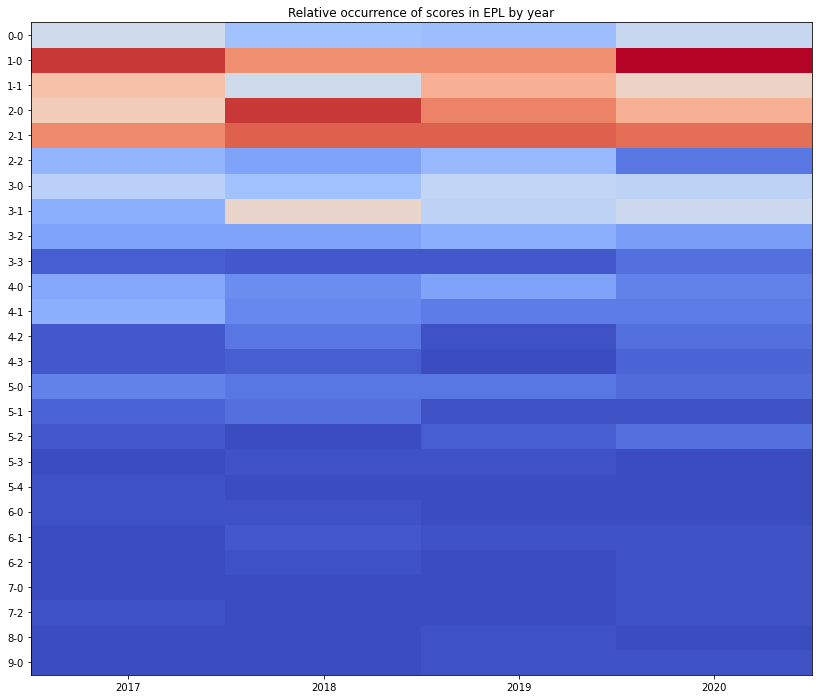

In [69]:
df = fractions

plt.figure(figsize=(14,12))
plt.pcolor(df[::-1], cmap='coolwarm')
yticks = np.arange(0.5, len(df.index), 1)
plt.yticks(list(reversed(yticks)), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), [x.split("-")[0] for x in df.columns])
plt.title("Relative occurrence of scores in EPL by year")
plt.show()